# Time Series Forecasting using NN, LSTM and CNN

## 1. Problem Formulation
<pre>
Time series forecasting is an important area of AI. It is important because there are so many prediction problems that involve a time component. This time component makes time series problems more difficult to handle. In this project, you practice with time series data to predict stock price.</pre>

In [1]:

import sys, os, time, warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
#CHAPTER_ID = "classification"

NOTEBOOK_PATH = os.getcwd()

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(NOTEBOOK_PATH, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


## DataSet 

This file has seven columns as follows:  Date, Open, High, Low, Close, Adj_Close, Volume.

Remove date and adj_close columns first since we do not need them.

In [2]:
data_df = pd.read_csv("CSC215_P2_Stock_Price.csv")


In [3]:
data_df.sample(5)

,Date,Open,High,Low,Close,Adj_Close,Volume
740,2003/3/11,6.475000,6.525000,6.462500,6.477500,6.477500,664400
3834,2015/6/24,72.019997,72.555000,71.394997,71.430000,71.430000,1914200
4304,2017/5/5,110.599998,110.849998,109.910004,110.580002,110.580002,842900
1951,2007/12/31,11.500000,11.562500,11.460000,11.497500,11.497500,2214400
3730,2015/1/26,64.750000,65.190002,64.410004,65.070000,65.070000,1997400


In [4]:
data_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume         int64
dtype: object

In [5]:
data_df=data_df.drop(['Date','Adj_Close'],axis=1)

## Missing Values

No missing values in the dataset

In [6]:
print('Number of missing values:')
[(x, y) for x, y in zip(data_df.isna().sum(), data_df.isna().sum().index) if x > 0]

Number of missing values:


[]

In [7]:
data_df = data_df.drop_duplicates(keep='first', inplace=False) 

In [8]:
dep_var = ['Close']

discrete_vars = ['Volume']

continuous_vars = ['Open','High','Low']

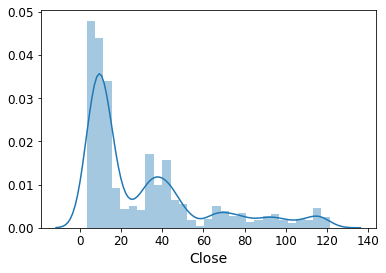

In [9]:
sns.distplot(data_df['Close'])

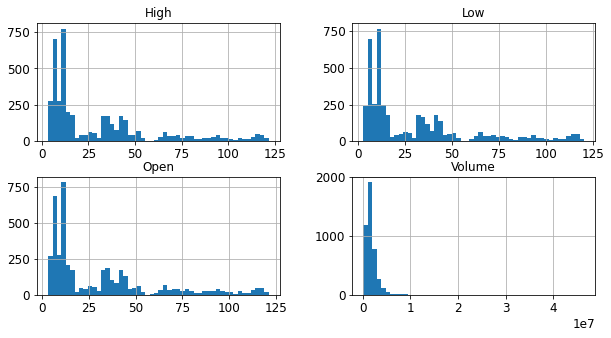

In [10]:
data_df.loc[:, discrete_vars + continuous_vars].hist(bins=50, figsize=(10,5))
plt.show()

### Correlation Analysis

In [11]:
corr_matrix = data_df.loc[:, ['Close'] + continuous_vars + discrete_vars].corr(method='pearson')
corr_matrix['Close'].sort_values(ascending=False)
corr_matrix

,Close,Open,High,Low,Volume
Close,1.000000,0.999806,0.999909,0.999912,0.047917
Open,0.999806,1.000000,0.999907,0.999899,0.048770
High,0.999909,0.999907,1.000000,0.999874,0.051444
Low,0.999912,0.999899,0.999874,1.000000,0.045101
Volume,0.047917,0.048770,0.051444,0.045101,1.000000


In [12]:
data_close = data_df['Close'].tolist()

In [13]:
data_close

[4.125,
 4.015625,
 4.0,
 3.84375,
 3.390625,
 3.4375,
 3.5,
 3.484375,
 3.578125,
 3.609375,
 3.640625,
 3.578125,
 3.578125,
 3.613275,
 3.609375,
 3.5625,
 3.515625,
 3.59375,
 3.65625,
 3.5625,
 3.765625,
 3.828125,
 3.703125,
 3.75,
 3.6875,
 3.640625,
 3.5625,
 3.6875,
 3.78125,
 3.8125,
 3.75,
 3.796875,
 3.734375,
 3.921875,
 4.09375,
 4.125,
 4.0,
 3.890625,
 3.828125,
 3.890625,
 3.90625,
 4.109375,
 4.328125,
 4.5,
 4.9375,
 5.078125,
 4.96875,
 4.796875,
 4.53125,
 4.28125,
 4.625,
 4.625,
 4.625,
 4.65625,
 4.59375,
 4.609375,
 4.578125,
 4.5,
 4.53125,
 4.453125,
 4.75,
 4.859375,
 4.96875,
 4.96875,
 4.78125,
 5.109375,
 5.0625,
 4.6289,
 5.140625,
 4.921875,
 5.0625,
 5.125,
 5.3125,
 5.5,
 5.53125,
 5.8125,
 5.734375,
 5.703125,
 5.96875,
 6.046875,
 6.015625,
 6.21875,
 6.1875,
 6.125,
 5.984375,
 5.875,
 5.765625,
 5.453125,
 5.65625,
 5.703125,
 5.78125,
 5.75,
 5.65625,
 5.625,
 5.53125,
 5.421875,
 5.609375,
 5.640625,
 5.703125,
 5.71875,
 5.6875,
 5.625,
 5.7968

In [14]:
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [15]:

# encode_numeric_zscore(data_df,'Open')
# encode_numeric_zscore(data_df,'High')
# encode_numeric_zscore(data_df,'Low')
# encode_numeric_zscore(data_df,'Close')
# #encode_numeric_zscore(dataFrame,'Adj Close')
# encode_numeric_zscore(data_df,'Volume')

In [16]:
data_df

,Open,High,Low,Close,Volume
0,3.812500,4.156250,3.812500,4.125000,3675600
1,4.125000,4.125000,4.000000,4.015625,1077600
2,4.000000,4.031250,3.953125,4.000000,437200
3,4.000000,4.000000,3.843750,3.843750,1883600
4,3.734375,3.734375,3.390625,3.390625,7931600
...,...,...,...,...,...
4387,113.790001,114.099998,112.790001,113.309998,950000
4388,112.519997,113.529999,111.160004,111.870003,1805200
4389,112.029999,112.489998,110.250000,112.230003,2136700
4390,112.459999,112.900002,112.000000,112.339996,1251600


## Normalization - Using MinMax Scaler sklearn

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_df = scaler.fit_transform(data_df)

In [18]:
data_df

array([[0.00437775, 0.00646865, 0.00693437, 0.00740835, 0.075401  ],
       [0.00703093, 0.00620462, 0.00853461, 0.0064823 , 0.01919424],
       [0.00596966, 0.00541254, 0.00813455, 0.00635001, 0.00533943],
       ...,
       [0.92316384, 0.92176368, 0.91533671, 0.9226992 , 0.04210747],
       [0.92681462, 0.92522774, 0.93027227, 0.92363047, 0.02295866],
       [0.92545622, 0.94119605, 0.93035763, 0.9308272 , 0.03074929]])

## Train-Test set split 

Create two separate copies of the “close” column and use one as output feature while the other as part of the input

In [19]:
def to_sequences(seq_size, data1, data2):
    x = []
    y = []

    for i in range(len(data1)-seq_size-1):
        #print(i)
        window = data1[i:(i+seq_size)]
        after_window = data2[i+seq_size]
        #window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x), np.array(y)


In [20]:
x,y = to_sequences(7, data_df, data_close)

In [21]:
print("Shape of x: {}".format(x.shape))
print("Shape of y: {}".format(y.shape))

Shape of x: (4384, 7, 5)
Shape of y: (4384,)


In [22]:


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3068, 7, 5) (1316, 7, 5) (3068,) (1316,)


In [23]:
X_tr_re = X_train.reshape(3068,7*5)
X_te_re = X_test.reshape(1316,7*5)

In [24]:
print("Shape of x_train: {}".format(X_tr_re.shape))
print("Shape of x_test: {}".format(X_te_re.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (3068, 35)
Shape of x_test: (1316, 35)
Shape of y_train: (3068,)
Shape of y_test: (1316,)


## Fully Connected Neural Network 

In [25]:
import io, requests, os, h5py

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
checkpoint_path = 'model_weight.hdf5'

model = Sequential()

model.add(Dense(128, input_dim=35, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

In [26]:
model.compile(loss='mean_squared_error')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=50, verbose=1, mode='auto')

checkpointer = ModelCheckpoint(filepath=checkpoint_path, verbose=0, save_best_only=True) # save best model

model.fit(X_tr_re, y_train,validation_data=(X_te_re,y_test),callbacks=[monitor],verbose=2,epochs=1000)


Epoch 1/1000
96/96 - 0s - loss: 514.2210 - val_loss: 4.9286
Epoch 2/1000
96/96 - 0s - loss: 2.7442 - val_loss: 4.8522
Epoch 3/1000
96/96 - 0s - loss: 2.4136 - val_loss: 2.5387
Epoch 4/1000
96/96 - 0s - loss: 2.3539 - val_loss: 2.8480
Epoch 5/1000
96/96 - 0s - loss: 2.4318 - val_loss: 2.4113
Epoch 6/1000
96/96 - 0s - loss: 2.2012 - val_loss: 5.1962
Epoch 7/1000
96/96 - 0s - loss: 2.1532 - val_loss: 3.8548
Epoch 8/1000
96/96 - 0s - loss: 2.1907 - val_loss: 2.6316
Epoch 9/1000
96/96 - 0s - loss: 2.1976 - val_loss: 2.2774
Epoch 10/1000
96/96 - 0s - loss: 2.1127 - val_loss: 2.7993
Epoch 11/1000
96/96 - 0s - loss: 2.1939 - val_loss: 3.0944
Epoch 12/1000
96/96 - 0s - loss: 2.0665 - val_loss: 2.1484
Epoch 13/1000
96/96 - 0s - loss: 2.0352 - val_loss: 4.1549
Epoch 14/1000
96/96 - 0s - loss: 1.9405 - val_loss: 2.0745
Epoch 15/1000
96/96 - 0s - loss: 1.9111 - val_loss: 2.5562
Epoch 16/1000
96/96 - 0s - loss: 1.8722 - val_loss: 2.4210
Epoch 17/1000
96/96 - 0s - loss: 2.0249 - val_loss: 2.1851
Epoc

Epoch 140/1000
96/96 - 0s - loss: 1.3023 - val_loss: 1.9112
Epoch 141/1000
96/96 - 0s - loss: 1.2881 - val_loss: 1.3085
Epoch 142/1000
96/96 - 0s - loss: 1.2939 - val_loss: 1.1999
Epoch 143/1000
96/96 - 0s - loss: 1.2342 - val_loss: 1.2451
Epoch 144/1000
96/96 - 0s - loss: 1.2081 - val_loss: 1.5471
Epoch 145/1000
96/96 - 0s - loss: 1.1710 - val_loss: 1.2512
Epoch 146/1000
96/96 - 0s - loss: 1.1756 - val_loss: 1.2388
Epoch 147/1000
96/96 - 0s - loss: 1.2291 - val_loss: 1.3100
Epoch 148/1000
96/96 - 0s - loss: 1.2576 - val_loss: 1.2020
Epoch 149/1000
96/96 - 0s - loss: 1.2601 - val_loss: 1.2449
Epoch 150/1000
96/96 - 0s - loss: 1.1593 - val_loss: 1.2871
Epoch 151/1000
96/96 - 0s - loss: 1.1313 - val_loss: 1.2392
Epoch 152/1000
96/96 - 0s - loss: 1.2563 - val_loss: 2.0436
Epoch 153/1000
96/96 - 0s - loss: 1.1800 - val_loss: 1.3218
Epoch 154/1000
96/96 - 0s - loss: 1.1703 - val_loss: 1.9443
Epoch 155/1000
96/96 - 0s - loss: 1.1280 - val_loss: 1.5288
Epoch 156/1000
96/96 - 0s - loss: 1.2099

In [27]:
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

Score_train (RMSE): 0.9675281315655782
Score_test (RMSE): 1.1625842944066456


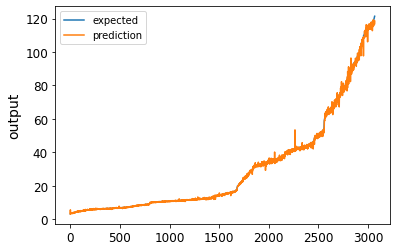

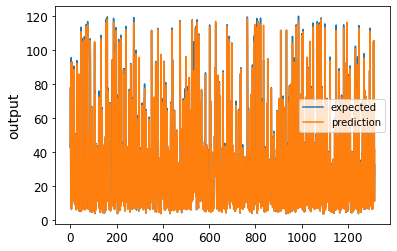

In [28]:

from sklearn import metrics

pred_train = model.predict(X_tr_re)
score_train = np.sqrt(metrics.mean_squared_error(pred_train,y_train))
pred_test = model.predict(X_te_re)
score_test = np.sqrt(metrics.mean_squared_error(pred_test,y_test))
print("Score_train (RMSE): {}".format(score_train))
print("Score_test (RMSE): {}".format(score_test))


chart_regression(pred_train.flatten(),y_train, sort=True)
chart_regression(pred_test.flatten(),y_test, sort=False)

In [29]:
print("R2 score",metrics.r2_score(y_test,pred_test))

R2 score 0.9984584088154889


In [30]:
df_y = pd.DataFrame(y_test, columns=['ground_truth'])
df_pred = pd.DataFrame(pred_test, columns=['predicted'])
result = pd.concat([df_y, df_pred],axis=1)
result

,ground_truth,predicted
0,42.775002,42.428997
1,78.220001,77.515213
2,11.000000,11.130077
3,7.395000,7.393027
4,95.680000,92.796242
...,...,...
1311,42.490002,42.561947
1312,33.980000,33.404217
1313,105.430000,105.854568
1314,10.867500,10.758877


## Parameter Tuning
<pre>
  Activation:  sigmoid
  Number of layers and neuron count in each layer
  Optimizer: sgd, adam
  Number of LSTM layers and neuron count in each layer : 2, (256, 128)</pre>
  L1 and L2 regularization 

In [31]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(256, input_dim=35, activation='tanh'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,  kernel_regularizer=regularizers.l1(0.01),
                     activity_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model

model.fit(X_tr_re, y_train,validation_data=(X_te_re,y_test),callbacks=[monitor],verbose=2,epochs=1000)


Epoch 1/1000
96/96 - 0s - loss: 451.3453 - val_loss: 35.2637
Epoch 2/1000
96/96 - 0s - loss: 28.6212 - val_loss: 22.2998
Epoch 3/1000
96/96 - 0s - loss: 18.8912 - val_loss: 16.4310
Epoch 4/1000
96/96 - 0s - loss: 15.4173 - val_loss: 14.3796
Epoch 5/1000
96/96 - 0s - loss: 13.2278 - val_loss: 12.4994
Epoch 6/1000
96/96 - 0s - loss: 12.1895 - val_loss: 12.1095
Epoch 7/1000
96/96 - 0s - loss: 11.1003 - val_loss: 11.4978
Epoch 8/1000
96/96 - 0s - loss: 10.8609 - val_loss: 10.6440
Epoch 9/1000
96/96 - 0s - loss: 10.3798 - val_loss: 10.0059
Epoch 10/1000
96/96 - 0s - loss: 9.4415 - val_loss: 9.3351
Epoch 11/1000
96/96 - 0s - loss: 9.2834 - val_loss: 9.1116
Epoch 12/1000
96/96 - 0s - loss: 8.7745 - val_loss: 8.5557
Epoch 13/1000
96/96 - 0s - loss: 8.2963 - val_loss: 8.2318
Epoch 14/1000
96/96 - 0s - loss: 7.9916 - val_loss: 8.2027
Epoch 15/1000
96/96 - 0s - loss: 7.5984 - val_loss: 7.7645
Epoch 16/1000
96/96 - 0s - loss: 7.3015 - val_loss: 7.3867
Epoch 17/1000
96/96 - 0s - loss: 7.5028 - val_

96/96 - 0s - loss: 2.2654 - val_loss: 3.5359
Epoch 140/1000
96/96 - 0s - loss: 2.1204 - val_loss: 2.4292
Epoch 141/1000
96/96 - 0s - loss: 2.1992 - val_loss: 2.3721
Epoch 142/1000
96/96 - 0s - loss: 1.9246 - val_loss: 2.1758
Epoch 143/1000
96/96 - 0s - loss: 2.0627 - val_loss: 2.3280
Epoch 144/1000
96/96 - 0s - loss: 1.9486 - val_loss: 3.2467
Epoch 145/1000
96/96 - 0s - loss: 2.1884 - val_loss: 2.3426
Epoch 146/1000
96/96 - 0s - loss: 2.0597 - val_loss: 2.2201
Epoch 147/1000
96/96 - 0s - loss: 1.9646 - val_loss: 2.2548
Epoch 148/1000
96/96 - 0s - loss: 2.2381 - val_loss: 2.1599
Epoch 149/1000
96/96 - 0s - loss: 1.8610 - val_loss: 2.1153
Epoch 150/1000
96/96 - 0s - loss: 1.8090 - val_loss: 2.1893
Epoch 151/1000
96/96 - 0s - loss: 2.0277 - val_loss: 3.5125
Epoch 152/1000
96/96 - 0s - loss: 1.7969 - val_loss: 2.1948
Epoch 153/1000
96/96 - 0s - loss: 2.0569 - val_loss: 2.9251
Epoch 154/1000
96/96 - 0s - loss: 2.5149 - val_loss: 2.2415
Epoch 155/1000
96/96 - 0s - loss: 1.9729 - val_loss: 2.

Score_train (RMSE): 0.91777833510478
Score_test (RMSE): 1.1195497699507053


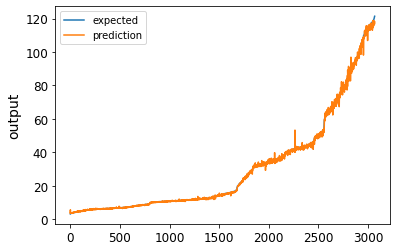

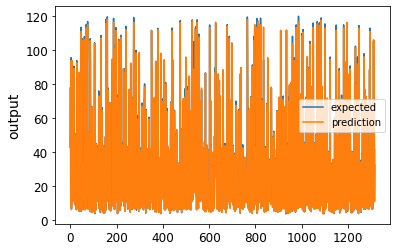

In [32]:

pred_train = model.predict(X_tr_re)
score_train = np.sqrt(metrics.mean_squared_error(pred_train,y_train))
pred_test = model.predict(X_te_re)
score_test = np.sqrt(metrics.mean_squared_error(pred_test,y_test))
print("Score_train (RMSE): {}".format(score_train))
print("Score_test (RMSE): {}".format(score_test))

#chart_regression(pred.flatten(),y_lstm_seq_test, sort=True)
chart_regression(pred_train.flatten(),y_train, sort=True)
chart_regression(pred_test.flatten(),y_test, sort=False)

In [33]:
print("R2 score",metrics.r2_score(y_test,pred_test))

R2 score 0.9985704244070049


## LSTM

In [34]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
model = Sequential()
look_back=5;
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(128, dropout=0.1, input_shape=(7,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model

model.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)


Epoch 1/1000
96/96 - 1s - loss: 1177.1539 - val_loss: 763.1726
Epoch 2/1000
96/96 - 1s - loss: 651.4116 - val_loss: 504.0492
Epoch 3/1000
96/96 - 0s - loss: 449.2348 - val_loss: 360.6415
Epoch 4/1000
96/96 - 0s - loss: 326.0652 - val_loss: 262.9069
Epoch 5/1000
96/96 - 0s - loss: 239.5699 - val_loss: 192.3513
Epoch 6/1000
96/96 - 0s - loss: 178.0371 - val_loss: 141.3067
Epoch 7/1000
96/96 - 0s - loss: 133.4328 - val_loss: 107.7489
Epoch 8/1000
96/96 - 0s - loss: 101.2680 - val_loss: 81.8182
Epoch 9/1000
96/96 - 0s - loss: 80.2845 - val_loss: 67.8669
Epoch 10/1000
96/96 - 0s - loss: 64.9849 - val_loss: 54.3345
Epoch 11/1000
96/96 - 0s - loss: 52.0826 - val_loss: 39.6306
Epoch 12/1000
96/96 - 0s - loss: 41.1460 - val_loss: 30.9036
Epoch 13/1000
96/96 - 0s - loss: 35.2858 - val_loss: 26.0760
Epoch 14/1000
96/96 - 0s - loss: 31.0337 - val_loss: 19.8225
Epoch 15/1000
96/96 - 0s - loss: 26.2183 - val_loss: 17.3488
Epoch 16/1000
96/96 - 0s - loss: 22.7976 - val_loss: 16.5431
Epoch 17/1000
96/

Score_train (RMSE): 2.3942369512785087
Score_test (RMSE): 2.531036943033939


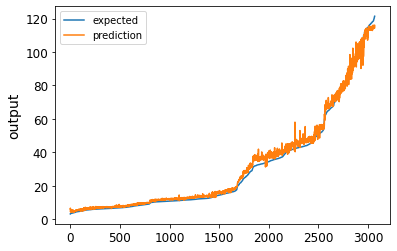

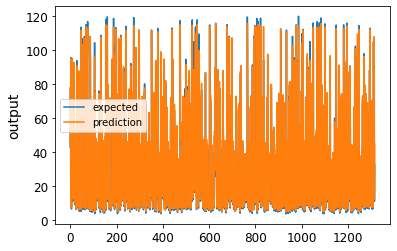

In [35]:
pred_train = model.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train,y_train))
pred_test = model.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test,y_test))
print("Score_train (RMSE): {}".format(score_train))
print("Score_test (RMSE): {}".format(score_test))

#chart_regression(pred.flatten(),y_lstm_seq_test, sort=True)
chart_regression(pred_train.flatten(),y_train, sort=True)
chart_regression(pred_test.flatten(),y_test, sort=False)

In [36]:
print("R2 score",metrics.r2_score(y_test,pred_test))

R2 score 0.9926933671828106


## Tuning the parameters 
<pre>
  Activation:  sigmoid
  Number of layers and neuron count in each layer
  Optimizer: adam 
  Number of LSTM layers and neuron count in each layer : 2, (128,64)</pre>

In [37]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
model = Sequential()
look_back=5;
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(128, dropout=0.1, input_shape=(7,look_back), activation='sigmoid'))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
#checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model

model.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)


Epoch 1/1000
96/96 - 1s - loss: 990.2831 - val_loss: 804.6890
Epoch 2/1000
96/96 - 1s - loss: 676.2104 - val_loss: 379.3260
Epoch 3/1000
96/96 - 0s - loss: 82.8990 - val_loss: 17.0752
Epoch 4/1000
96/96 - 0s - loss: 18.3922 - val_loss: 10.5057
Epoch 5/1000
96/96 - 1s - loss: 14.4750 - val_loss: 7.0137
Epoch 6/1000
96/96 - 1s - loss: 11.8697 - val_loss: 5.5962
Epoch 7/1000
96/96 - 1s - loss: 10.9038 - val_loss: 8.1113
Epoch 8/1000
96/96 - 0s - loss: 9.7566 - val_loss: 4.4225
Epoch 9/1000
96/96 - 0s - loss: 9.9678 - val_loss: 3.2673
Epoch 10/1000
96/96 - 0s - loss: 10.7467 - val_loss: 4.0233
Epoch 11/1000
96/96 - 0s - loss: 9.9218 - val_loss: 5.1627
Epoch 12/1000
96/96 - 0s - loss: 9.4189 - val_loss: 3.6051
Epoch 13/1000
96/96 - 0s - loss: 10.0392 - val_loss: 7.2137
Epoch 14/1000
96/96 - 0s - loss: 9.6434 - val_loss: 3.9192
Epoch 15/1000
96/96 - 0s - loss: 9.1506 - val_loss: 3.5206
Epoch 16/1000
96/96 - 0s - loss: 9.6879 - val_loss: 6.2407
Epoch 17/1000
96/96 - 0s - loss: 9.0668 - val_lo

Score_train (RMSE): 1.758968442434162
Score_test (RMSE): 1.8648732499705263


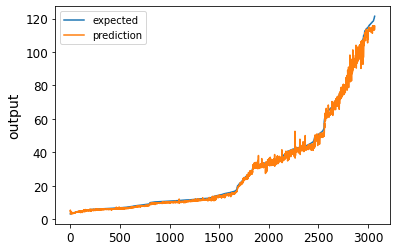

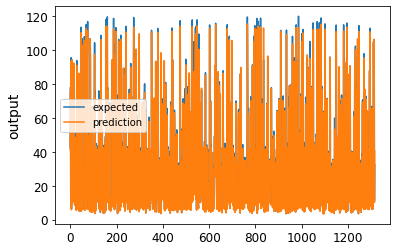

In [38]:
pred_train = model.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train,y_train))
pred_test = model.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test,y_test))
print("Score_train (RMSE): {}".format(score_train))
print("Score_test (RMSE): {}".format(score_test))

#chart_regression(pred.flatten(),y_lstm_seq_test, sort=True)
chart_regression(pred_train.flatten(),y_train, sort=True)
chart_regression(pred_test.flatten(),y_test, sort=False)

In [39]:
print("R2 score",metrics.r2_score(y_test,pred_test))

R2 score 0.9960333950124509


## CNN

In [40]:
data_df.shape

(4392, 5)

In [41]:
seq_size = 7
def to_sequences_cnn(seq_size, data1 ,data2):
    x = []
    y = []

    for i in range(len(data1)-seq_size-1):
        #print(i)
        window = data1[i:(i+seq_size)]
        after_window = data2[i+seq_size]
        window = [[x] for x in window]
       #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [42]:
x_cnn_model,y_cnn_model = to_sequences_cnn(7, data_df, data_close)

In [43]:
print("Shape of X: {}".format(x_cnn_model.shape))
print("Shape of Y: {}".format(y_cnn_model.shape))

Shape of X: (4384, 7, 1, 5)
Shape of Y: (4384,)


#### Changing the shape of data into 7 pixels and 5 channels

In [44]:
x_cnn_model = x_cnn_model.reshape(4384, 1, 7, 5)

#### Splitting the data into test and train

In [45]:
x_train_cnn,x_test_cnn,y_train_cnn,y_test_cnn = train_test_split(x_cnn_model,y_cnn_model, test_size=0.3, random_state =42)

In [46]:
print("Shape of x_train: {}".format(x_train_cnn.shape))
print("Shape of x_test: {}".format(x_test_cnn.shape))

Shape of x_train: (3068, 1, 7, 5)
Shape of x_test: (1316, 1, 7, 5)


In [47]:
print("Shape of y_train: {}".format(y_train_cnn.shape))
print("Shape of y_test: {}".format(y_test_cnn.shape))

Shape of y_train: (3068,)
Shape of y_test: (1316,)


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [49]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='tanh',input_shape=(1,7,5),padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1),activation='tanh',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(128,kernel_size=(3, 3), strides=(1, 1),activation='tanh',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(256,kernel_size=(3, 3), strides=(1, 1),activation='tanh',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(500, activation='tanh'))
cnn_model.add(Dropout(0.20))
cnn_model.add(Dense(1))
cnn_model.summary()

checkpointer = ModelCheckpoint(filepath="best_weights_cnn.hdf5", verbose=0, save_best_only=True) # save best model
cnn_model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
cnn_model.fit(x_train_cnn, y_train_cnn,batch_size=64,validation_data=(x_test_cnn,y_test_cnn),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 7, 32)          1472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 4, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 2, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 2, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 256)        

In [50]:
from sklearn import metrics

cnn_model.load_weights('best_weights_cnn.hdf5')

cnn_model_pred = cnn_model.predict(x_test_cnn)

score = np.sqrt(metrics.mean_squared_error(y_test_cnn,cnn_model_pred)) 

print("Score (RMSE) : {}".format(score))
print("R2 score     :",metrics.r2_score(y_test_cnn,cnn_model_pred))
print("MSE          :", metrics.mean_squared_error(y_test_cnn, cnn_model_pred))

Score (RMSE) : 1.5222146347284295
R2 score     : 0.9972309774251573
MSE          : 2.317137394181406


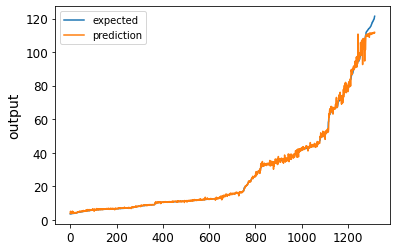

In [51]:
chart_regression(cnn_model_pred.flatten(),y_test_cnn)

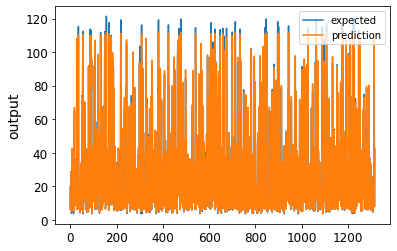

In [52]:
chart_regression(cnn_model_pred.flatten(),y_test_cnn,sort=False)

In [53]:
print("R2 score",metrics.r2_score(y_test_cnn,cnn_model_pred))

R2 score 0.9972309774251573


### Parameter tuning with activation function as sgd and optimizer as relu.

In [56]:
cnn_model = Sequential()
cnn_model.add(Conv2D(20, kernel_size=(3, 3), strides=(2, 2),activation='relu',input_shape=(1,7,5),padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(45, kernel_size=(3, 3), strides=(2, 2),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(110,kernel_size=(3, 3), strides=(2, 2),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Conv2D(200,kernel_size=(3, 3), strides=(2, 2),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dropout(0.20))
cnn_model.add(Dense(1))
cnn_model.summary()

checkpointer = ModelCheckpoint(filepath="best_weights_cnn.hdf5", verbose=0, save_best_only=True) # save best model
cnn_model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
cnn_model.fit(x_train_cnn, y_train_cnn,batch_size=64,validation_data=(x_test_cnn,y_test_cnn),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 1, 4, 20)          920       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 2, 20)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 45)          8145      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 45)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 1, 110)         44660     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 110)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 200)        

In [57]:
from sklearn import metrics

cnn_model.load_weights('best_weights_cnn.hdf5')

cnn_model_pred = cnn_model.predict(x_test_cnn)

score = np.sqrt(metrics.mean_squared_error(y_test_cnn,cnn_model_pred)) 

print("Score (RMSE) : {}".format(score))
print("R2 score     :",metrics.r2_score(y_test_cnn,cnn_model_pred))
print("MSE          :", metrics.mean_squared_error(y_test_cnn, cnn_model_pred))

Score (RMSE) : 1.4281422615619583
R2 score     : 0.9975626513768059
MSE          : 2.039590319259305


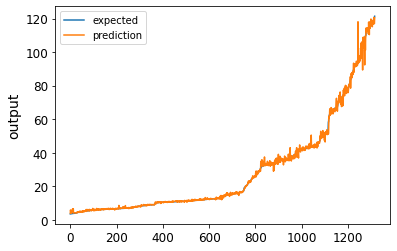

In [58]:
chart_regression(cnn_model_pred.flatten(),y_test_cnn)

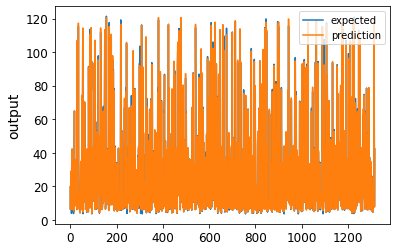

In [59]:
chart_regression(cnn_model_pred.flatten(),y_test_cnn,sort=False)

In [60]:
print("R2 score",metrics.r2_score(y_test_cnn,cnn_model_pred))

R2 score 0.9975626513768059


## Additional Features

#### Best value for number of days (N) we should consider in past for LSTM.

### N=3

In [ ]:
x_model_3,y_model_3 = to_sequences(3, data_df, data_close)

In [ ]:
x_train_lstm,x_test_lstm,y_train_lstm,y_test_lstm = train_test_split(x_model_3,y_model_3, test_size=0.3, random_state =42)
print("Shape of x_train: {}".format(x_train_lstm.shape))
print("Shape of x_test: {}".format(x_test_lstm.shape))
print("Shape of y_train: {}".format(y_train_lstm.shape))
print("Shape of y_test: {}".format(y_test_lstm.shape))

In [ ]:
#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights_lstm.hdf5", verbose=0, save_best_only=True) # save best model

model = Sequential()
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1,input_shape=(3, 5)))
model.add(Dense(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')
model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),callbacks=[monitor,checkpointer],verbose=2, epochs=1000) 


In [ ]:
model.load_weights('best_weights_lstm.hdf5')
pred = model.predict(x_test_lstm)
score = np.sqrt(metrics.mean_squared_error(pred,y_test_lstm))
print("RMSE         : {}".format(score))
print("MSE          :", metrics.mean_squared_error(y_test_lstm, pred))
print("R2 score     :",metrics.r2_score(y_test_lstm,pred))
# Plot the chart
chart_regression(pred.flatten(),y_test_lstm)

In [ ]:
chart_regression(pred.flatten(),y_test_lstm,sort=False)

### N = 5

In [ ]:
x_model_5,y_model_5 = to_sequences(5, data_df, data_close)

In [ ]:
x_train_lstm,x_test_lstm,y_train_lstm,y_test_lstm = train_test_split(x_model_5,y_model_5, test_size=0.3, random_state =42)
print("Shape of x_train: {}".format(x_train_lstm.shape))
print("Shape of x_test: {}".format(x_test_lstm.shape))
print("Shape of y_train: {}".format(y_train_lstm.shape))
print("Shape of y_test: {}".format(y_test_lstm.shape))

In [ ]:
#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights_lstm.hdf5", verbose=0, save_best_only=True) # save best model

model = Sequential()
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1,input_shape=(5, 5)))
model.add(Dense(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')
model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),callbacks=[monitor,checkpointer],verbose=2, epochs=1000) 



In [ ]:
model.load_weights('best_weights_lstm.hdf5')
pred = model.predict(x_test_lstm)
score = np.sqrt(metrics.mean_squared_error(pred,y_test_lstm))
print("RMSE         : {}".format(score))
print("MSE          :", metrics.mean_squared_error(y_test_lstm, pred))
print("R2 score     :",metrics.r2_score(y_test_lstm,pred))
# Plot the chart
chart_regression(pred.flatten(),y_test_lstm)

In [ ]:
chart_regression(pred.flatten(),y_test_lstm,sort=False)

### N = 10

In [ ]:
x_model_10,y_model_10 = to_sequences(10, data_df, data_close)

In [ ]:
x_train_lstm,x_test_lstm,y_train_lstm,y_test_lstm = train_test_split(x_model_10,y_model_10, test_size=0.3, random_state =42)
print("Shape of x_train: {}".format(x_train_lstm.shape))
print("Shape of x_test: {}".format(x_test_lstm.shape))
print("Shape of y_train: {}".format(y_train_lstm.shape))
print("Shape of y_test: {}".format(y_test_lstm.shape))

In [ ]:
#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights_lstm.hdf5", verbose=0, save_best_only=True) # save best model

model = Sequential()
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1,input_shape=(10, 5)))
model.add(Dense(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')
model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),callbacks=[monitor,checkpointer],verbose=2, epochs=1000) 




In [ ]:
model.load_weights('best_weights_lstm.hdf5')
pred = model.predict(x_test_lstm)
score = np.sqrt(metrics.mean_squared_error(pred,y_test_lstm))
print("RMSE         : {}".format(score))
print("MSE          :", metrics.mean_squared_error(y_test_lstm, pred))
print("R2 score     :",metrics.r2_score(y_test_lstm,pred))
# Plot the chart
chart_regression(pred.flatten(),y_test_lstm)

In [ ]:
chart_regression(pred.flatten(),y_test_lstm,sort=False)

### N = 20

In [ ]:
x_model_20,y_model_20 = to_sequences(20, data_df, data_close)

In [ ]:
x_train_lstm,x_test_lstm,y_train_lstm,y_test_lstm = train_test_split(x_model_20,y_model_20, test_size=0.3, random_state =42)
print("Shape of x_train: {}".format(x_train_lstm.shape))
print("Shape of x_test: {}".format(x_test_lstm.shape))
print("Shape of y_train: {}".format(y_train_lstm.shape))
print("Shape of y_test: {}".format(y_test_lstm.shape))

In [ ]:
#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights_lstm.hdf5", verbose=0, save_best_only=True) # save best model

model = Sequential()
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1,input_shape=(20, 5)))
model.add(Dense(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')
model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),callbacks=[monitor,checkpointer],verbose=2, epochs=1000) 




In [ ]:
model.load_weights('best_weights_lstm.hdf5')
pred = model.predict(x_test_lstm)
score = np.sqrt(metrics.mean_squared_error(pred,y_test_lstm))
print("RMSE         : {}".format(score))
print("MSE          :", metrics.mean_squared_error(y_test_lstm, pred))
print("R2 score     :",metrics.r2_score(y_test_lstm,pred))
# Plot the chart
chart_regression(pred.flatten(),y_test_lstm)

In [ ]:
chart_regression(pred.flatten(),y_test_lstm,sort=False)

 2) As an additional feature predict the stock prices for next 5 days and have comapared the True price and predicted price.

### Methodology 

1. We have performed the following steps, 
2. Data cleaning
3. Data Preprocessing  
5. EDA - Exploratory Data Analysis 
6. Model Training
7. Result Analysis
</pre>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('CSC215_P2_Stock_Price.csv')

In [ ]:
df.drop(['Date','Adj_Close'], axis=1, inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Stock_Price_Prediction', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [ ]:
df

In [ ]:
next_days = 5

In [ ]:
df['Prediction'] = df['Close'].shift(-next_days)

In [ ]:
df.sample(5)

In [ ]:
x = np.array(df.drop(['Prediction', 'Open', 'High', 'Low', 'Volume'], 1))[:-next_days]
print(x)

In [ ]:
y = np.array(df['Prediction'])[:-next_days]
print(y)

In [ ]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print("x:", x.shape, "y:", y.shape)

In [ ]:
y = y.reshape(y.shape[0], 1)

In [ ]:
in_dim = (x.shape[1], x.shape[2])
out_dim = y.shape[1]

In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.30)

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=in_dim, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam") 
model.summary()

In [ ]:
model.fit(xtrain, ytrain, epochs=100, batch_size=12, verbose=0)

In [ ]:
ypred = model.predict(xtest)

In [ ]:
ytest[:]

In [ ]:
print("MSE:%.4f" % mean_squared_error(ytest[:,0], ypred[:,0]))


In [ ]:
x_ax = range(len(xtest))
plt.title("LSTM multi-output prediction")
plt.scatter(x_ax, ytest[:,0],  s=6, label="y1-test")
plt.plot(x_ax, ypred[:,0], label="y1-pred")
plt.scatter(x_ax, ytest[:],  s=6, label="y2-test")
plt.plot(x_ax, ypred[:], label="y2-pred")
plt.legend()
plt.show()

 3) As an additional feature we have selected two companies Google and Tesla for analysing stock prices.We have planned on analysing stock prices from 2010 to 2020.

### Methodology 

1. We have performed the following steps, 
2. Data cleaning
3. Data Preprocessing 
4. Normalization 
5. EDA - Exploratory Data Analysis 
6. Model Training
7. Result Analysis
</pre>

In [ ]:
g_data_df = pd.read_csv('GOOG.csv')
a_data_df = pd.read_csv('AAPL.csv')


In [ ]:
g_data_df.head(5)

In [ ]:
a_data_df.head(5)

In [ ]:
print(g_data_df.shape)
print(a_data_df.shape)

In [ ]:
print('Number of missing values:')
[(x, y) for x, y in zip(a_data_df.isna().sum(), a_data_df.isna().sum().index) if x > 0]

print('Number of missing values:')
[(x, y) for x, y in zip(g_data_df.isna().sum(), g_data_df.isna().sum().index) if x > 0]

In [ ]:
g_data_df = g_data_df.drop_duplicates(keep='first', inplace=False) 
a_data_df = a_data_df.drop_duplicates(keep='first', inplace=False) 

In [ ]:
g_data_df.drop(['Date','Adj Close'], axis=1, inplace=True)
a_data_df.drop(['Date','Adj Close'], axis=1, inplace=True)

In [ ]:
print(g_data_df.shape)
print(a_data_df.shape)

In [ ]:
a_stock_close = a_data_df['Close'].tolist()
g_stock_close = g_data_df['Close'].tolist()

## Normalization - Using MinMax Scaler sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
a_data_df = scaler.fit_transform(a_data_df)
g_data_df = scaler.fit_transform(g_data_df)

In [ ]:
print("Apple stock")
print(a_data_df)

print("Google stock")
print(g_data_df)

In [ ]:
def to_sequences(seq_size, data1, data2):
    x = []
    y = []

    for i in range(len(data1)-seq_size-1):
        #print(i)
        window = data1[i:(i+seq_size)]
        after_window = data2[i+seq_size]
        x.append(window)
        y.append(after_window)
        
    return np.array(x), np.array(y)

In [ ]:
x_a,y_a = to_sequences(7, a_data_df, a_stock_close)
x_g,y_g = to_sequences(7, g_data_df, g_stock_close)
print("Shape of x(AAPL): {}".format(x_a.shape))
print("Shape of y(AAPL): {}".format(y_a.shape))
print("Shape of x(GOOG): {}".format(x_g.shape))
print("Shape of y(GOOG): {}".format(y_g.shape))

In [ ]:

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(x_a, y_a, test_size=0.5, random_state=42)
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(x_g, y_g, test_size=0.5, random_state=42)

print(X_train_a.shape, X_test_a.shape, y_train_a.shape, y_test_a.shape)
print(X_train_g.shape, X_test_g.shape, y_train_g.shape, y_test_g.shape)

In [ ]:
X_tr_a= X_train_a.reshape(1237,7*5)
X_te_a= X_test_a.reshape(1237,7*5)
X_tr_g= X_train_g.reshape(1237,7*5)
X_te_g= X_test_g.reshape(1237,7*5)

##  Model Training - AAPL 

<pre> Using Bidirectional LSTM </pre>

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Bidirectional
model = Sequential()
look_back=5;
# create and fit the LSTM network
model.add(Bidirectional(LSTM(64),input_shape=(7,look_back)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))



In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=50, verbose=1, mode='auto')
#checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model

model.fit(X_train_a, y_train_a,validation_data=(X_test_a,y_test_a),callbacks=[monitor],verbose=2,epochs=1000)



In [ ]:
# For AAPL dataset
pred_train = model.predict(X_train_a)
score_train = np.sqrt(metrics.mean_squared_error(pred_train,y_train_a))
pred_test = model.predict(X_test_a)
score_test = np.sqrt(metrics.mean_squared_error(pred_test,y_test_a))
print("Score_train (RMSE): {}".format(score_train))
print("Score_test (RMSE): {}".format(score_test))

#chart_regression(pred.flatten(),y_lstm_seq_test, sort=True)
chart_regression(pred_train.flatten(),y_train_a, sort=True)
chart_regression(pred_test.flatten(),y_test_a, sort=False)

In [ ]:
print("R2 score",metrics.r2_score(y_test_a,pred_test))

###  Plot analysis on Actual and Predicted For AAPL

In [ ]:
plt.figure(figsize=(15,5))
x = np.arange(1,50)
plt.plot(x,y_test_a[:49], '-o', label='Actual',color ='blue')
plt.plot(x, pred_test[:49], ':o', label='Predicted',color = 'red',linewidth = 1)

plt.legend()

In [ ]:
df_y = pd.DataFrame(y_test_a, columns=['ground_truth'])
df_pred = pd.DataFrame(pred_test, columns=['predicted'])
result = pd.concat([df_y, df_pred],axis=1)
result

###  Scatter Plot analysis on true and predicted - AAPL

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
plt.scatter(y_test_a, pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test_a, pred_test)))
print('R-squared = %.4f' % r2_score(y_test_a, pred_test))

## Model training 2

<pre> Using Bidirectional LSTM </pre>

In [ ]:
#checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model

model.fit(X_train_g, y_train_g,validation_data=(X_test_g,y_test_g),callbacks=[monitor],verbose=2,epochs=1000)

In [ ]:
# For GOOG dataset
pred_train = model.predict(X_train_g)
score_train = np.sqrt(metrics.mean_squared_error(pred_train,y_train_g))
pred_test_g = model.predict(X_test_g)
score_test = np.sqrt(metrics.mean_squared_error(pred_test_g,y_test_g))
print("Score_train (RMSE): {}".format(score_train))
print("Score_test (RMSE): {}".format(score_test))

#chart_regression(pred.flatten(),y_lstm_seq_test, sort=True)
chart_regression(pred_train.flatten(),y_train_g, sort=True)
chart_regression(pred_test_g.flatten(),y_test_g, sort=False)

In [ ]:
print("R2 score",metrics.r2_score(y_test_g,pred_test_g))

### Plot analysis on Actual and Predicted For AAPL

In [ ]:
plt.plot(x,y_test_g[:49], '-o', label='Actual',color ='blue')
plt.plot(x, pred_test_g[:49], ':o', label='Predicted',color = 'red',linewidth = 1)

plt.legend()

In [ ]:
df_y = pd.DataFrame(y_test_g, columns=['ground_truth'])
df_pred = pd.DataFrame(pred_test_g, columns=['predicted'])
result = pd.concat([df_y, df_pred],axis=1)
result

### Scatter Plot analysis on true and predicted - GOOG

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
plt.scatter(y_test_g, pred_test_g, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test_g, pred_test_g)))
print('R-squared = %.4f' % r2_score(y_test_g, pred_test_g))